**Unidad III: Lectura y visualización de datos irregulares**

In [122]:
import pandas as pd
import numpy as np
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
import os
import matplotlib.pyplot as plt

os.chdir("C:/Users/Heber/Desktop/CRMVK NUBE MINERA 2019/GSLIB_FOLDER")

df = pd.read_csv("C:/Users/Heber/Desktop/CRMVK NUBE MINERA 2019/dataset/dataset_irregular.csv", sep=";")
df.rename(columns={"Unnamed: 0":"ID"}, inplace=True)
df.drop(columns={"ID"}, inplace=True)
df.head()

,X,Y,VA
0,200.0,800.0,12.090045
1,200.0,600.0,11.696657
2,200.0,400.0,8.750095
3,200.0,200.0,6.724989
4,400.0,800.0,11.010015


In [123]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,36.0,501.944444,245.738763,0.000000,350.000000,525.00000,687.500000,990.00000
Y,36.0,446.666667,266.737967,9.000000,200.000000,409.50000,600.000000,949.00000
VA,36.0,7.678176,3.862341,0.682431,4.720342,6.76927,10.259861,17.28426


In [124]:
xmin= 0; xmax=1000; ymin=0; ymax=1000
cmap= plt.cm.jet

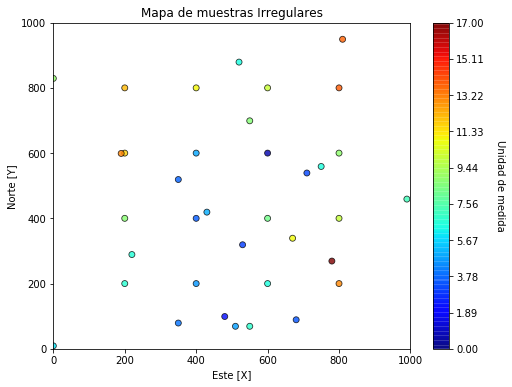

In [125]:
GSLIB.locmap(df, "X", "Y", "VA", xmin, xmax, ymin, ymax, 0,17, "Mapa de muestras Irregulares", "Este [X]", "Norte [Y]", "Unidad de medida", cmap, "fig_title")
plt.show()

**Unidad III: Análisis Estructural**

In [129]:
tmin= 0; tmax=100; xlag=100; xltol =50; nlag=10; atol=30; bandwh=100; isill = 1

lag000, vario000, np000 = geostats.gamv(df, "X", "Y", "VA", tmin, tmax, xlag, xltol, nlag, 0, atol, bandwh, isill)
lag090, vario090, np090 = geostats.gamv(df, "X", "Y", "VA", tmin, tmax, xlag, xltol, nlag, 90, atol, bandwh, isill)
lag045, vario045, np045 = geostats.gamv(df, "X", "Y", "VA", tmin, tmax, xlag, xltol, nlag, 45, atol, bandwh, isill)
lag135, vario135, np135 = geostats.gamv(df, "X", "Y", "VA", tmin, tmax, xlag, xltol, nlag, 135, atol, bandwh, isill)

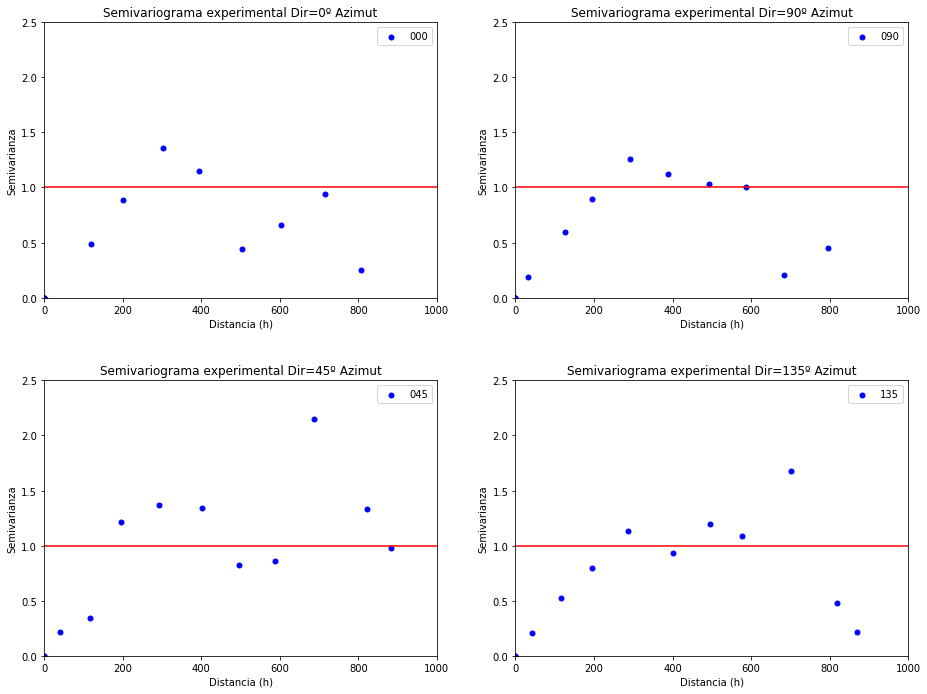

In [131]:
plt.subplot(221)
plt.scatter(lag000, vario000, s=25, marker="o", color="blue", label="000")
plt.plot([0,1000], [1,1], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=0º Azimut")
plt.ylim(0,2.5)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(222)
plt.scatter(lag090, vario090, s=25, marker="o", color="blue", label="090")
plt.plot([0,1000], [1,1], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=90º Azimut")
plt.ylim(0,2.5)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(223)
plt.scatter(lag045, vario045, s=25, marker="o", color="blue", label="045")
plt.plot([0,1000], [1,1], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=45º Azimut")
plt.ylim(0,2.5)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(224)
plt.scatter(lag135, vario135, s=25, marker="o", color="blue", label="135")
plt.plot([0,1000], [1,1], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental Dir=135º Azimut")
plt.ylim(0,2.5)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

In [132]:
lagiso, varioiso, npiso = geostats.gamv(df, "X", "Y", "VA", tmin, tmax, xlag, xltol, nlag, 0, 90, 9999, isill)

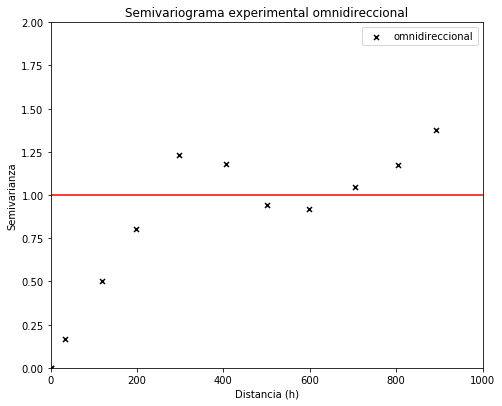

In [133]:
plt.subplot(111)
plt.scatter(lagiso, varioiso, s=25, marker="x", color="black", label="omnidireccional")
plt.plot([0,1000], [1,1], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("Semivariograma experimental omnidireccional")
plt.ylim(0,2)
plt.xlim(0,1000)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [134]:
GSLIB.make_variogram()

TypeError: make_variogram() missing 7 required positional arguments: 'nug', 'nst', 'it1', 'cc1', 'azi1', 'hmaj1', and 'hmin1'

In [135]:
vario_kri = GSLIB.make_variogram(0, 1, 1, 1, 0, 300, 300)

**Unidad III: Estimación y Categorización**

In [154]:
tmin=0;tmax=100;xmn=0;ymn=0;ysiz=10;xsiz=10;nx=100;ny=100
nxdis=1;nydis=1;ndmin=1;ndmax=12;radius=300;ktype=1;skmean=1

kmap, vmap = geostats.kb2d(df, "X", "Y", "VA", tmin, tmax, nx, xmn, xsiz, ny, ymn, ysiz, nxdis, nydis, ndmin, ndmax, radius, ktype, skmean, vario_kri)

  Estimated   10000 blocks 
      average   8.466278098521105  variance  9.429722088865361


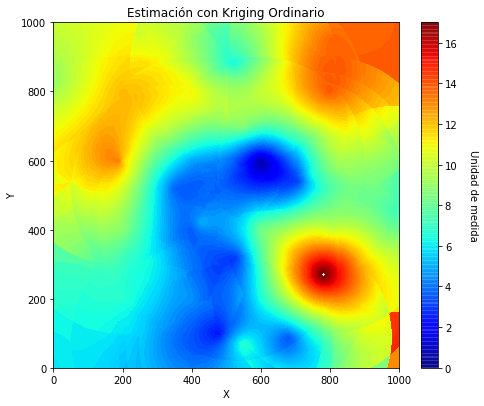

In [148]:
plt.subplot(111)
GSLIB.pixelplt_st(kmap, xmin, xmax,ymin,ymax,xsiz,0,17,"Estimación con Kriging Ordinario", "X", "Y", "Unidad de medida", cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [149]:
vmap[vmap < 0] = 0

In [150]:
cv_map = 2*(np.sqrt(vmap))/kmap
cv_map.max()

0.8635503864195194

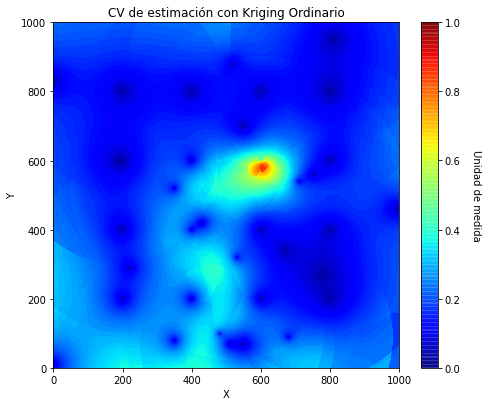

In [151]:
plt.subplot(111)
GSLIB.pixelplt_st(cv_map, xmin, xmax,ymin,ymax,xsiz,0,1,"CV de estimación con Kriging Ordinario", "X", "Y", "Unidad de medida", cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [152]:
cat_ko = np.where(cv_map > 0.5, "3",
                  (np.where(cv_map < 0.25, "1", "2")))

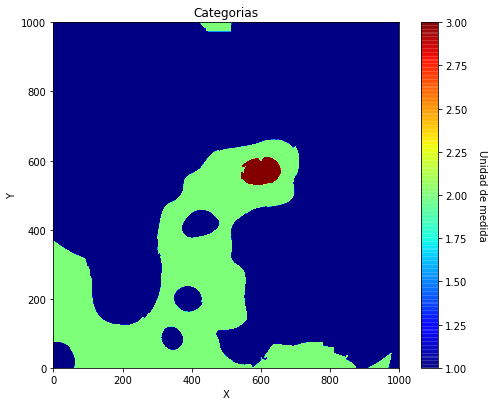

In [153]:
plt.subplot(111)
GSLIB.pixelplt_st(cat_ko, xmin, xmax,ymin,ymax,xsiz,1,3,"Categorias", "X", "Y", "Unidad de medida", cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()